In [4]:
pacotes <- c("IntroCompFinR", "tidyquant","tidyverse")
for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
}
options(warn = -1)

In [5]:
acoes <- c("TRPL4.SA","ITUB4.SA", "GRND3.SA", "ABCB4.SA", "WEGE3.SA")
data_inicio <- Sys.Date()-365*8
ret_d <- tq_get(acoes, from = data_inicio) %>%
  group_by(symbol) %>%
  tq_transmute(select = adjusted, mutate_fun = dailyReturn) %>%
  spread(key = symbol, value = daily.returns)

In [7]:
retorno_medio <- colMeans(ret_d[,-1])*252
print(retorno_medio)

 ABCB4.SA  GRND3.SA  ITUB4.SA  TRPL4.SA  WEGE3.SA 
0.1749844 0.2240167 0.1803508 0.3220771 0.4036003 


In [9]:
covar <- cov(ret_d[,-1], use = "na.or.complete")*252
covar

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,0.11945378,0.03638613,0.05989391,0.02768519,0.03017428
GRND3.SA,0.03638613,0.09996073,0.03911624,0.02320566,0.02765609
ITUB4.SA,0.05989391,0.03911624,0.10732247,0.03325012,0.03764480
TRPL4.SA,0.02768519,0.02320566,0.03325012,0.08514866,0.01788177
WEGE3.SA,0.03017428,0.02765609,0.03764480,0.01788177,0.10487137


In [10]:
matriz_cor <- cor(ret_d[,-1], use = "na.or.complete")
matriz_cor

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,1.0000000,0.3329823,0.5289778,0.2745104,0.2695930
GRND3.SA,0.3329823,1.0000000,0.3776565,0.2515303,0.2701143
ITUB4.SA,0.5289778,0.3776565,1.0000000,0.3478236,0.3548388
TRPL4.SA,0.2745104,0.2515303,0.3478236,1.0000000,0.1892314
WEGE3.SA,0.2695930,0.2701143,0.3548388,0.1892314,1.0000000


In [11]:
tx_livre_risco <- 0.02

In [19]:
short_selling <- T

In [20]:
carteira_eficiente <- tangency.portfolio(retorno_medio, covar, tx_livre_risco, shorts = short_selling)

carteira_eficiente

Call:
tangency.portfolio(er = retorno_medio, cov.mat = covar, risk.free = tx_livre_risco, 
    shorts = short_selling)

Portfolio expected return:     0.3727895 
Portfolio standard deviation:  0.2394238 
Portfolio weights:
ABCB4.SA GRND3.SA ITUB4.SA TRPL4.SA WEGE3.SA 
 -0.0058   0.1282  -0.1365   0.4857   0.5284 

In [21]:
sharpe <- (carteira_eficiente$er-tx_livre_risco)/carteira_eficiente$sd
sharpe

[1] 1.473494

In [22]:
carteira_min_risco <- globalMin.portfolio(retorno_medio, covar, shorts = short_selling)

carteira_min_risco

Call:
globalMin.portfolio(er = retorno_medio, cov.mat = covar, shorts = short_selling)

Portfolio expected return:     0.2915829 
Portfolio standard deviation:  0.2100684 
Portfolio weights:
ABCB4.SA GRND3.SA ITUB4.SA TRPL4.SA WEGE3.SA 
  0.1273   0.2223   0.0691   0.3383   0.2431 

In [23]:
npor <- 100
fronteira_eficiente <- efficient.frontier(retorno_medio, covar, npor, shorts = short_selling)

fronteira_eficiente

attributes(fronteira_eficiente)

Call:
efficient.frontier(er = retorno_medio, cov.mat = covar, nport = npor, 
    shorts = short_selling)

Frontier portfolios' expected returns and standard deviations
   port 1 port 2 port 3 port 4 port 5 port 6 port 7 port 8 port 9 port 10
ER 0.4596 0.4573 0.4551 0.4528 0.4506 0.4483 0.4460 0.4438 0.4415  0.4392
SD 0.3172 0.3148 0.3124 0.3101 0.3077 0.3054 0.3031 0.3008 0.2985  0.2962
   port 11 port 12 port 13 port 14 port 15 port 16 port 17 port 18 port 19
ER   0.437  0.4347  0.4325  0.4302  0.4279  0.4257  0.4234  0.4211  0.4189
SD   0.294  0.2918  0.2895  0.2874  0.2852  0.2830  0.2809  0.2788  0.2767
   port 20 port 21 port 22 port 23 port 24 port 25 port 26 port 27 port 28
ER  0.4166  0.4143  0.4121  0.4098  0.4076  0.4053  0.4030  0.4008  0.3985
SD  0.2746  0.2726  0.2705  0.2685  0.2665  0.2646  0.2626  0.2607  0.2589
   port 29 port 30 port 31 port 32 port 33 port 34 port 35 port 36 port 37
ER  0.3962  0.3940  0.3917  0.3895  0.3872  0.3849  0.3827  0.3804  0.3781
SD  0.2570

$names
[1] "call"    "er"      "sd"      "weights"

$class
[1] "Markowitz"

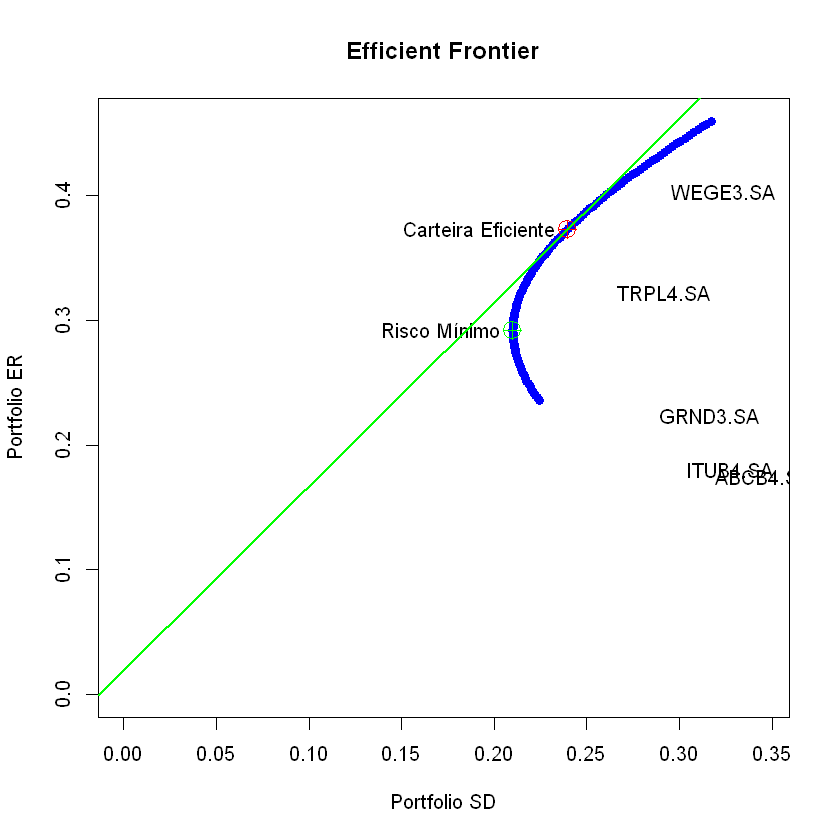

In [24]:
plot(fronteira_eficiente, plot.asset = TRUE,
     col = ifelse(fronteira_eficiente$er == carteira_eficiente$er,"red",
                  "blue"), pch = 16)
points(carteira_min_risco$sd, carteira_min_risco$er, col = "green", pch = 10, cex = 2)
points(carteira_eficiente$sd, carteira_eficiente$er, col = "red", pch = 10, cex = 2)
text(carteira_min_risco$sd, carteira_min_risco$er, labels = "Risco Mínimo", pos = 2)
text(carteira_eficiente$sd, carteira_eficiente$er, labels = "Carteira Eficiente", pos = 2)
tangente <- (carteira_eficiente$er - tx_livre_risco)/carteira_eficiente$sd
abline(a = tx_livre_risco, b = tangente, col = "green", lwd = 2)

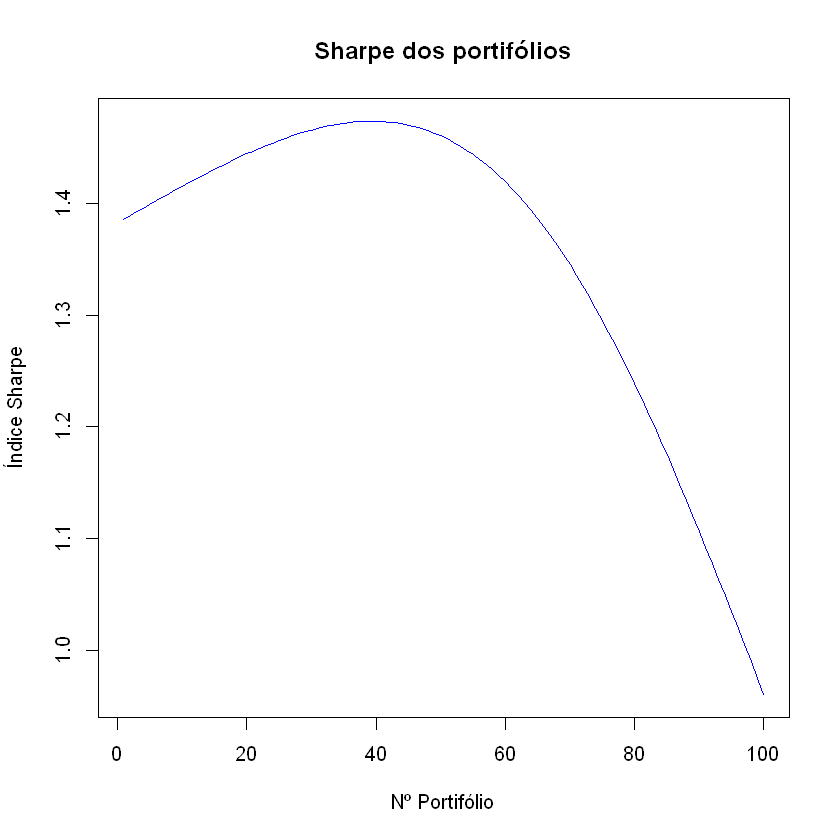

In [25]:
plot(1:npor, (fronteira_eficiente$er - tx_livre_risco)/fronteira_eficiente$sd,
     col = "blue", ylab = "Índice Sharpe", xlab = "Nº Portifólio", type = 'l',
    main = "Sharpe dos portifólios")
abline(h = 0)